# Развитие индустрии игр в начале XXI века

## Введение

Необходимо изучить развитие игровой индустрии с 2000 по 2013 год. В начале XXI века индустрия игр активно росла: развивались игровые платформы и появлялись мощные консоли (PlayStation 2, Xbox, Nintendo Wii). Возникало множество игровых жанров, а также росло количество многопользовательских онлайн-игр и сообществ.

### Цели и задачи проекта

**Цели**: подоготовить набор данных для статьи о развитии индустрии игр в начале XXI века. 

**Задачи**: 
1. Провоерить данные на корреткность. Наличие ошибок, пропусков, явных и неявных дубликатов.
2. Провести предобработку данных после выявления ошибок:
    - преобразовать данные к нужному типу;
    - исправить ошибки в данных;
    - обработать пропуски;
    - избавиться от явных и неявных дубликатов.
3. Создать срез данных (игры вышедшие с 2000 по 2013 год включительно).
4. Котегоризировать игры в зависимости от оценки выставленной игре пользователями (`user_score`) и критиками (`critic_score`).
5. Выделить топ-7 платформ по количеству игр, выпущенных за период с 2000 по 2013 годы.
6. Подготовка итогового вывода.

### Описание данных

В проекте используется датасет `new_games.csv`, содержащий информацию о продажах игр разных жанров и платформ, а также пользовательские и экспертные оценки игр.

---


## Знакомство с данными: загрузка и первичная предобработка

Выгрузим данные из таблицы `new_games.csv` и импортируем необходимые библиотеки.

1. Проведем анализ полученных данных: данные какого объёма мы получили, соответствуют ли они описанию, встречаются ли в них пропуски, используются ли верные типы данных.
2. Изучим другие особенности данных. Например, проверим названия столбцов: все ли названия отражают содержимое данных и прописаны в удобном для работы виде.

In [1]:
# Загружаем библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://...')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16956 entries, 0 to 16955
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16954 non-null  object 
 1   Platform         16956 non-null  object 
 2   Year of Release  16681 non-null  float64
 3   Genre            16954 non-null  object 
 4   NA sales         16956 non-null  float64
 5   EU sales         16956 non-null  object 
 6   JP sales         16956 non-null  object 
 7   Other sales      16956 non-null  float64
 8   Critic Score     8242 non-null   float64
 9   User Score       10152 non-null  object 
 10  Rating           10085 non-null  object 
dtypes: float64(4), object(7)
memory usage: 1.4+ MB


In [4]:
df.head()

,Name,Platform,Year of Release,Genre,NA sales,EU sales,JP sales,Other sales,Critic Score,User Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
# Выведем информацию о размере таблицы
df.shape

(16956, 11)

### Промежуточный вывод

1. Предоставленная таблица состоит из 11 колонок и 16956 строк. Данные соотвествуют описанию.
2. Не для всех колонок используются верные типы данных: 
    - Для поля `Year of Release` используется тип данных `float64`. Лучше использовать тип `date` т.к. дата выхода игры.
    - Для полей `EU sales`, `JP sales`, Score используется тип данных `object`. Лучше использовать `float64` так как в этих полях хранится информация в виде вещественного числа.
    - Для поля `Rating` так же мог бы подойти тип данных `category` т.к. в полях хранится информация о рейтинге и эта информация может быть ограничена узким списком значений.
3. В названиях колонок присутствуют пробелы. Названия необходимо привести к формату snake case.
4. В части столбцов обнаружены пропуски: 
    - `Name`;
    - `Year of Release`;
    - `Genre`;
    - `Critic Score`;
    - `User Score`;
    - `Rating`.

---


## Проверка ошибок в данных и их предобработка

### Названия, или метки, столбцов датафрейма

1. Выведем на экран названия всех столбцов датафрейма и проверим их стиль написания.
2. Приведем все столбцы к стилю snake case. 

In [6]:
# Выведем названия всех столбцов
df.columns

Index(['Name', 'Platform', 'Year of Release', 'Genre', 'NA sales', 'EU sales',
       'JP sales', 'Other sales', 'Critic Score', 'User Score', 'Rating'],
      dtype='object')

In [7]:
# Отредактируем названия в соотвествии с требованиям
df = df.rename(columns={'Name': 'name',
                        'Platform': 'platform',
                        'Year of Release': 'year_of_release', 
                        'Genre': 'genre', 
                        'NA sales': 'na_sales',
                        'JP sales': 'jp_sales', 
                        'EU sales': 'eu_sales', 
                        'Other sales': 'other_sales',
                        'Critic Score': 'critic_score', 
                        'User Score': 'user_score', 
                        'Rating': 'rating'})

In [8]:
# Убедимся что данные отредактированы корректно
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Промежуточный вывод

1. Проверили стиль написания столбцов датафрейма. 
2. Привели названия всех столбцов к стилю snake case.

### Типы данных

1. Изучим уникальные значения в стобцах датафрейма, чтобы определить для каких столбцов требуется изменить тип данных.
2. Определим причины возникновения некорректных типов данных.
3. Проведем преобразование некорректных типов данных.

In [9]:
# Выведем текущие типы столбцов
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16956 entries, 0 to 16955
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16954 non-null  object 
 1   platform         16956 non-null  object 
 2   year_of_release  16681 non-null  float64
 3   genre            16954 non-null  object 
 4   na_sales         16956 non-null  float64
 5   eu_sales         16956 non-null  object 
 6   jp_sales         16956 non-null  object 
 7   other_sales      16956 non-null  float64
 8   critic_score     8242 non-null   float64
 9   user_score       10152 non-null  object 
 10  rating           10085 non-null  object 
dtypes: float64(4), object(7)
memory usage: 1.4+ MB


In [10]:
df['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [11]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [12]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan, 'MISC', 'ROLE-PLAYING', 'RACING', 'ACTION',
       'SHOOTER', 'FIGHTING', 'SPORTS', 'PLATFORM', 'ADVENTURE',
       'SIMULATION', 'PUZZLE', 'STRATEGY'], dtype=object)

In [13]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Колонки `name`, `platform`, `genre`, `rating` хранят строковые значения и имеют тип `object`. **Преобразований не требуется.**

---


In [14]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Колонка `critic_score` хранит числовые значения и имеет тип `float64`. **Преобразований не требуется.**

---


In [15]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Колонка `year_of_release` хранит значения даты релиза и имеет тип `float64`. **Необходимо преобразовать тип в `datetime64[ns]`.** 

Так же для удобства дальнейших вычислений создадим колонку `year_int`, где будем хранить год релиза в целочисленном виде. Это значение будет полезно при создании среза данных.

In [16]:
# Сохраним в колонку year_int значения из колонки year_of_release
df['year_int'] = df['year_of_release']

Преобразование значения в колоне в целочисленное проведем после обработки пропусков.

In [17]:
# Изменим тип данных для колонки year_of_release на datetime
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y')


---

Колонки `eu_sales`, `jp_sales`, `user_score` хранятся числовые значения и используется тип данных `object`. **Необходимо выяснить причину использования неверного типа. Изменить тип для данных колонок на `float64`.**

In [18]:
df['eu_sales'].unique()

array(['28.96', '3.58', '12.76', '10.93', '8.89', '2.26', '9.14', '9.18',
       '6.94', '0.63', '10.95', '7.47', '6.18', '8.03', '4.89', '8.49',
       '9.09', '0.4', '3.75', '9.2', '4.46', '2.71', '3.44', '5.14',
       '5.49', '3.9', '5.35', '3.17', '5.09', '4.24', '5.04', '5.86',
       '3.68', '4.19', '5.73', '3.59', '4.51', '2.55', '4.02', '4.37',
       '6.31', '3.45', '2.81', '2.85', '3.49', '0.01', '3.35', '2.04',
       '3.07', '3.87', '3.0', '4.82', '3.64', '2.15', '3.69', '2.65',
       '2.56', '3.11', '3.14', '1.94', '1.95', '2.47', '2.28', '3.42',
       '3.63', '2.36', '1.71', '1.85', '2.79', '1.24', '6.12', '1.53',
       '3.47', '2.24', '5.01', '2.01', '1.72', '2.07', '6.42', '3.86',
       '0.45', '3.48', '1.89', '5.75', '2.17', '1.37', '2.35', '1.18',
       '2.11', '1.88', '2.83', '2.99', '2.89', '3.27', '2.22', '2.14',
       '1.45', '1.75', '1.04', '1.77', '3.02', '2.75', '2.16', '1.9',
       '2.59', '2.2', '4.3', '0.93', '2.53', '2.52', '1.79', '1.3', '2.6',
   

In [19]:
df['jp_sales'].unique()

array(['3.77', '6.81', '3.79', '3.28', '10.22', '4.22', '6.5', '2.93',
       '4.7', '0.28', '1.93', '4.13', '7.2', '3.6', '0.24', '2.53',
       '0.98', '0.41', '3.54', '4.16', '6.04', '4.18', '3.84', '0.06',
       '0.47', '5.38', '5.32', '5.65', '1.87', '0.13', '3.12', '0.36',
       '0.11', '4.35', '0.65', '0.07', '0.08', '0.49', '0.3', '2.66',
       '2.69', '0.48', '0.38', '5.33', '1.91', '3.96', '3.1', '1.1',
       '1.2', '0.14', '2.54', '2.14', '0.81', '2.12', '0.44', '3.15',
       '1.25', '0.04', '0.0', '2.47', '2.23', '1.69', '0.01', '3.0',
       '0.02', '4.39', '1.98', '0.1', '3.81', '0.05', '2.49', '1.58',
       '3.14', '2.73', '0.66', '0.22', '3.63', '1.45', '1.31', '2.43',
       '0.7', '0.35', '1.4', '0.6', '2.26', '1.42', '1.28', '1.39',
       '0.87', '0.17', '0.94', '0.19', '0.21', '1.6', '0.16', '1.03',
       '0.25', '2.06', '1.49', '1.29', '0.09', '2.87', '0.03', '0.78',
       '0.83', '2.33', '2.02', '1.36', '1.81', '1.97', '0.91', '0.99',
       '0.95', '2.0'

In [20]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В колонках `eu_sales`, `jp_sales` встречается значение 'unknown', в колонке `user_score` 'tbd'. Это строковые значения из-за них столбцы имеют не верный тип данных `object`.

Из-за пропусков в столбцах мы не можем преобразовать их тип к `float64` стандартным образом. С помощью аргумента `coerce` это возможно. При этом все пропуски заменятся на NaN.

In [21]:
# Приведем данные в столбцах к типу float64, с использованием аргумента 'coerce' для замены всех пропусков на NaN
df['eu_sales'] = pd.to_numeric(df['eu_sales'], errors='coerce')
df['jp_sales'] = pd.to_numeric(df['jp_sales'], errors='coerce')
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [22]:
# Убедимся, что мы получили необходимые типы данных в стоблцах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16956 entries, 0 to 16955
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16954 non-null  object        
 1   platform         16956 non-null  object        
 2   year_of_release  16681 non-null  datetime64[ns]
 3   genre            16954 non-null  object        
 4   na_sales         16956 non-null  float64       
 5   eu_sales         16950 non-null  float64       
 6   jp_sales         16952 non-null  float64       
 7   other_sales      16956 non-null  float64       
 8   critic_score     8242 non-null   float64       
 9   user_score       7688 non-null   float64       
 10  rating           10085 non-null  object        
 11  year_int         16681 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 1.6+ MB


####  Промежуточный вывод

1. Изучили типы данных используемые для столбцов. Преобразовали типы данных для колонок:
    - `year_of_release` из `float64` в `object`;
    - `eu_sales`, `jp_sales`, `user_score` из `object` в `float64`.
2. Завели дополнительный столбец для дальнейших вычислений `year_int`, где будем хранить год релиза в целочисленном виде. Это значение будет полезно при создании среза данных.

---


### Наличие пропусков в данных

Рассчитаем количество пропусков в каждом столбце в абсолютных и относительных значениях.

In [23]:
# Посчитаем количество пропусков в абсолютных значениях 
df.isna().sum().sort_values(ascending=True)

platform              0
na_sales              0
other_sales           0
name                  2
genre                 2
jp_sales              4
eu_sales              6
year_of_release     275
year_int            275
rating             6871
critic_score       8714
user_score         9268
dtype: int64

In [24]:
# Посчитаем долю пропусков
df.isna().mean()

name               0.000118
platform           0.000000
year_of_release    0.016218
genre              0.000118
na_sales           0.000000
eu_sales           0.000354
jp_sales           0.000236
other_sales        0.000000
critic_score       0.513918
user_score         0.546591
rating             0.405225
year_int           0.016218
dtype: float64

Пропуски встречаются в стобцах:
- `name` - 2 пропуска, тип пропуска MCAR, отсутвие названия игры можно объяснить человеческим фактором или техническими причинами;
- `year_of_release` - 275 пропусков, тип пропуска MNAR сложно предположить почему информация о дате выхода игры отсутствует т.к. пропусков достаточно много сложно предположить что это ошибка или человеческий фактор;
- `genre` - 2 пропуска, тип пропуска MCAR отсутвие названия игры можно объяснить человеческим фактором или техническими причинами;
- `eu_sales` - 6 пропусков, тип пропуска MNAR;
- `jp_sales` - 4 пропуска, тип пропуска MNAR;
- `critic_score` - 8714 пропусков, тип пропуска MAR можно предположить, что информация по рейтингам просто не велась и не аггрегировалась до определенного года;
- `user_score` - 9268 пропусков, тип пропуска MAR;
- `rating` - 6871 пропуск, тип пропуска MAR.

Без информации о названии и жанре строки теряют аналитическую ценность, так как невозможно идентифицировать игру или отнести её к категории. Поэтому данные строки можно удалить, тем более что их совсем немного.

In [25]:
# Отбираем строки без пропусков в столбце name
df = df.dropna(subset=['name'])

In [26]:
# Отбираем строки без пропусков в столбце genre
df = df.dropna(subset=['genre'])

Так как в полях `eu_sales`, `jp_sales` незначительное кол-во пропусков. Пропущенные значения мы можем заполнить средним.

In [27]:
# Заполним средним, пропущенные значения для поля eu_sales
def mean_game_sales(row):
    if pd.isna(row['eu_sales']):
        group = df[(df['platform'] == row['platform']) &
                   (df['year_of_release'] == row['year_of_release'])]
        return group['eu_sales'].mean()
    else:
        return row['eu_sales']

df['eu_sales'] = df.apply(mean_game_sales, axis=1)

In [28]:
# Заполним средним, пропущенные значения для поля jp_sales
def mean_game_sales(row):
    if pd.isna(row['jp_sales']):
        group = df[(df['platform'] == row['platform']) &
                   (df['year_of_release'] == row['year_of_release'])]
        return group['jp_sales'].mean()
    else:
        return row['jp_sales']

df['jp_sales'] = df.apply(mean_game_sales, axis=1)


---

Так как в колонках `rating`, `critic_score`, `user_score` присутвует значительное кол-во пропусков. Заменим пропущенные значения на индикаторы.

In [29]:
# В колонах rating  заменим пропущенные значения на значение индикатор (пустаря строка '') 
df['rating'] = df['rating'].fillna('')

In [30]:
# Заменим пропуски в полях critic_score, user_score на индикатор: (-1)
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)

In [31]:
# Отберем строки без пропусков в столбце year_of_release 
df = df[~df['year_of_release'].isna()]

In [32]:
# Преобразуем тип данных в колонке year_of_release в int64
df['year_int'] = df['year_int'].astype('int16')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_int
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2006
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,,1985
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,2009
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,,1996


In [33]:
#Убедимся, что в данных больше нет пропусков или они заменены на индикаторы
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
year_int           0
dtype: int64

In [34]:
# Количество строк после удаления пропусков
df.shape

(16679, 12)

#### Промежуточный вывод

1. Определили колонки с пропусками, расчитали долю пропусков в этих колонках:

    - `name` доля пропусков: 0.000118;
    - `year_of_release` доля пропусков: 0.016218;
    - `genre` доля пропусков: 0.000118;
    - `eu_sales` доля пропусков: 0.000354;
    - `jp_sales` доля пропусков: 0.000236;
    - `critic_score` доля пропусков: 0.513918;
    - `user_score` доля пропусков: 0.546591;
    - `rating` доля пропусков: 0.405225;
    - `year_int` доля пропусков: 0.016218.
    

2. Выдвинули предположения о причинах возникновения пропусков:

    - `name` - 2 пропуска, тип пропуска MCAR, отсутвие названия игры можно объяснить человеческим фактором или техническими причинами;
    - `year_of_release` - 275 пропусков, тип пропуска MNAR сложно предположить почему информация о дате выхода игры отсутствует т.к. пропусков достаточно много сложно предположить что это ошибка или человеческий фактор;
    - `genre` - 2 пропуска, тип пропуска MCAR отсутвие названия игры можно объяснить человеческим фактором или техническими причинами;
    - `eu_sales` - 6 пропусков, тип пропуска MNAR;
    - `jp_sales` - 4 пропуска, тип пропуска MNAR;
    - `critic_score` - 8714 пропусков, тип пропуска MAR можно предположить, что информация по рейтингам просто не велась и не аггрегировалась до определенного года;
    - `user_score` - 9268 пропусков, тип пропуска MAR;
    - `rating` - 6871 пропуск, тип пропуска MAR;
    
3. Удалили строки с пропусками в колонах `name` и `genre`;
4. Заменили средним пропущенные значенияв полях `eu_sales`, `jp_sales`;
5. Так как в колонках `rating`, `critic_score`, `user_score` присутвует значительное кол-во пропусков. Заменили пропущенные значения на индикаторы.
6. После обработки пропусков преобразовали значения в столбце `year_int` к типу `int16`.
    
---    


## Явные и неявные дубликаты в данных

1. Изучим уникальные значения в категориальных данных, например с названиями жанра игры, платформы, рейтинга и года выпуска. Проверим, встречаются ли среди данных неявные дубликаты, связанные с опечатками или разным способом написания.
2. При необходимости проведем нормализацию данных с текстовыми значениями. Названия или жанры игр приведем к нижнему регистру, а названия рейтинга — к верхнему.

### Неявные дубликаты

In [35]:
# Посчитаем количество строк в таблице до удаления дубликатов
initial_row_count = df.shape[0]


---

Можно предположить, в колонке name присутствует большое количество названий игрю. Визуально определить наличие неявных дубликатов не получится.Поэтому для начала рассчитаем кол-во уникальных значений в этом поле.

In [36]:
df['name'].nunique()

11426

Так как значений оказалось действительно много проведем нормализацию значений в этом поле.

In [37]:
# Нормализуем данные в колонке name, приведем все значения к нижмему регистру, удалим пробелы в начаел и конце строки
df['name'] = df['name'].str.lower()
df['name'] = df['name'].str.strip()

# Рассчитаем количество уникальных значений после преобразования
df['name'].nunique()

11426

Количество уникальных значений не изменилось, следовательно в колонке не было неявных дубликатов.

---


In [38]:
# Проверим встречаются ли неявные дубликаты колонке genre, выведем все уникальные значения
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', 'MISC', 'ROLE-PLAYING', 'RACING', 'ACTION', 'SHOOTER',
       'FIGHTING', 'SPORTS', 'PLATFORM', 'ADVENTURE', 'SIMULATION',
       'PUZZLE', 'STRATEGY'], dtype=object)

In [39]:
df['genre'].nunique()

24

In [40]:
# Нормализуем данные в колонке genre, приведем все значения к нижмему регистру
df['genre'] = df['genre'].str.lower()

# Рассчитаем количество уникальных значений после преобразования
df['genre'].nunique()

12

Количество уникальных значений уменьшилось 2 раза, следовательно в колонке присутствовали неявные дубликаты.

---


In [41]:
# Проверим встречаются ли неявные дубликаты колонке platform, выведем все уникальные значения
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [42]:
df['platform'].nunique()

31

In [43]:
# Нормализуем данные в колонке platform, приведем все значения к верхнему регистру 
df['platform'] = df['platform'].str.upper()

# Рассчитаем количество уникальных значений после преобразования
df['platform'].nunique()

31

Количество уникальных значений не изменилось, следовательно в колонке не было неявных дубликатов.

---


In [44]:
# Проверим встречаются ли неявные дубликаты колонке rating
df['rating'].unique()

array(['E', '', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [45]:
# Заменим устаревшее значения рейтмнга K-A (Kids to Adults) на текущее E (Everyone)
df['rating'] = df['rating'].str.replace('K-A', 'E')

In [46]:
df['rating'].unique()

array(['E', '', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

В колонке `rating` неявных дубликатов не обнаружено.

---


### Явные дубликаты

In [47]:
# Рассчитаем количество явных дубликатов
df.duplicated().sum()

235

В данных присутствует 235 явных дубликатов. Для их удаления воспользуемся методом `drop_duplicates()`. Текущий датафрейм оставим без изменения. Создадим отедьный датафрей для очищенных данных `df_cleaned`.

In [48]:
# Отсортируем датафрейм по всем столбцам
df_sorted = df.sort_values(by=list(df.columns))

# Удаляем дубликаты
df_cleaned = df.drop_duplicates(subset=None, keep='first', inplace=False)
final_row_count = df_cleaned.shape[0]

In [49]:
df_cleaned_len = len(df_cleaned)

print(f"Количество строк до удаления дубликатов: {initial_row_count}")
print(f"Количество строк после удаления строк: {df_cleaned_len}")
print(f"Количество удаленных строк: {initial_row_count-df_cleaned_len}")
print(f"Доля удаленных строк: {round((initial_row_count-df_cleaned_len)/initial_row_count, 3)}")

Количество строк до удаления дубликатов: 16679
Количество строк после удаления строк: 16444
Количество удаленных строк: 235
Доля удаленных строк: 0.014


##### Промежуточный вывод

1. С помощью метода `unique()` в столбце `genre` нашли неявные дубликаты. Для нормализации данных применили метод `str.upper()`.
2. В датафрейме нашли 235 явных дубликатов. Для их удаления воспользовались методом `drop_duplicates()`. Текущий датафрейм оставили без изменения. Создадали отедьный датафрей для очищенных данных `df_cleaned`.
3. Количество строк до удаления дубликатов - 16679, после удаления - 16444. Всего удалили 235 строк, доля удаленных строк 0.014. 

---


### Промежуточный вывод

**Названия, или метки, столбцов датафрейма**

1. Проверили стиль написания столбцов датафрейма. 
2. Привели названия всех столбцов к стилю snake case.

**Типы данных**

1. Изучили типы данных используемые для столбцов. Преобразовали типы данных для колонок:
    - `year_of_release` из `float64` в `object`;
    - `eu_sales`, `jp_sales`, `user_score` из `object` в `float64`.
2. Завели дополнительный столбец для дальнейших вычислений `year_int`, где будем хранить год релиза в целочисленном виде. Это значение будет полезно при создании среза данных.


**Обработка пропусков**

1. Определили колонки с пропусками, расчитали долю пропусков в этих колонках:

    - `name` доля пропусков: 0.000118;
    - `year_of_release` доля пропусков: 0.016218;
    - `genre` доля пропусков: 0.000118;
    - `eu_sales` доля пропусков: 0.000354;
    - `jp_sales` доля пропусков: 0.000236;
    - `critic_score` доля пропусков: 0.513918;
    - `user_score` доля пропусков: 0.546591;
    - `rating` доля пропусков: 0.405225;
    - `year_int` доля пропусков: 0.016218.

2. Удалили строки с пропусками в колонах `name` и `genre`;
3. Заменили средним пропущенные значенияв полях `eu_sales`, `jp_sales`;
4. Так как в колонках `rating`, `critic_score`, `user_score` присутвует значительное кол-во пропусков. Заменили пропущенные значения на индикаторы.
5. После обработки пропусков преобразовали значения в столбце `year_int` к типу `int16`.


**Явные и неявные дубликаты в данных**

1. С помощью метода `unique()` в столбце `genre` нашли неявные дубликаты. Для нормализации данных применили метод `str.upper()`.
2. В датафрейме нашли 235 явных дубликатов. Для их удаления воспользовались методом `drop_duplicates()`. Текущий датафрейм оставили без изменения. Создадали отедьный датафрей для очищенных данных `df_cleaned`.
3. Количество строк до удаления дубликатов - 16679, после удаления - 16444. Всего удалили 235 строк.

---


## Фильтрация данных

Отберем данные по полю `df_atual`, период с 2000 по 2013 год влючительно.

In [50]:
df_actual = df_cleaned.loc[(df_cleaned['year_int'] >= 2000) &
                           (df_cleaned['year_int'] <= 2013)]

In [51]:
# Посчитаем кол-во игр выпущенных в период с 2000 по 2013 год 
print(df_actual.shape[0])

12781


In [52]:
# Посчитаем кол-во игр выпущенных в каждый год за указанный выше период
grouped_games_by_year = df_actual.groupby('year_int')['name'].count()
print('Количество игр выпущенных в каждый год')
print(grouped_games_by_year)

Количество игр выпущенных в каждый год
year_int
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
Name: name, dtype: int64


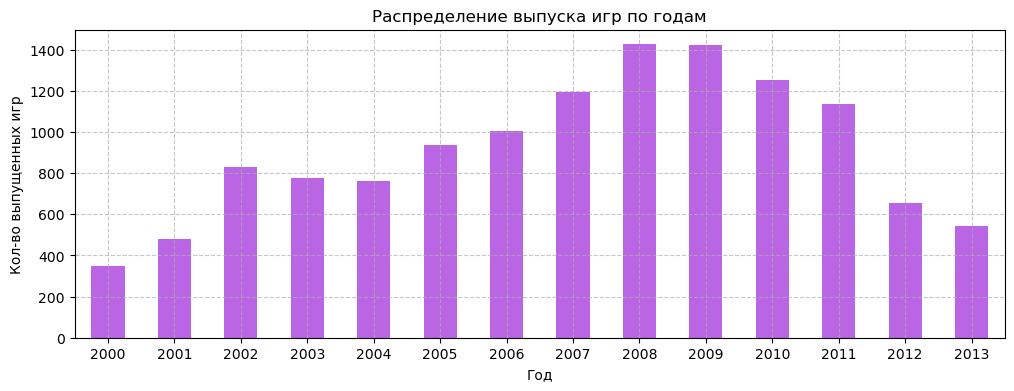

In [53]:
# Строим столбчатую диаграмму
grouped_games_by_year.plot(
               kind='bar', 
               rot=0,
               figsize=(12, 4),
               color='#b965e4'
               
)

plt.grid(True, linestyle='--', alpha=0.7)

# Настраиваем оформление графика
plt.title(f'Распределение выпуска игр по годам')
plt.xlabel('Год')
plt.ylabel('Кол-во выпущенных игр')

# Выводим график
plt.show()

## Категоризация данных

### Категоризация данных по оценкам пользователей

Проведем категоризацию данных. Разделим все игры по оценкам пользователей и выделим следующие категории: 
- **высокая оценка** (от 8 до 10 включительно);
- **средняя оценка** (от 3 до 8, не включая правую границу интервала);
- **низкая оценка** (от 0 до 3, не включая правую границу интервала).

In [54]:
# Чтобы избежать ошибко при добавлении нового стобца содадим копию таблицы df_actual 
df_actual_user_score = df_actual.copy()

In [55]:
# Категроризируем оценки пользователей
df_actual_user_score['user_score_category'] = pd.cut(df_actual['user_score'],
                                          bins=[-1, 0, 3, 8, 10],
                                          labels=["Нет оценки", "Низкая оценка", "Средняя оценка", "Высокая оценка"],
                                          right=False,
                                          include_lowest=True).astype('category')

In [56]:
df_actual_user_score.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_int,user_score_category
0,wii sports,WII,2006-01-01,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2006,Высокая оценка
2,mario kart wii,WII,2008-01-01,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008,Высокая оценка
3,wii sports resort,WII,2009-01-01,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,2009,Высокая оценка
6,new super mario bros.,DS,2006-01-01,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,2006,Высокая оценка
7,wii play,WII,2006-01-01,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,2006,Средняя оценка


### Категоризация данных по оценкам критиков

Разделим все игры по оценкам критиков и выделим следующие категории: 
- **высокая оценка** (от 80 до 100 включительно); 
- **средняя оценка** (от 30 до 80, не включая правую границу интервала); 
- **низкая оценка** (от 0 до 30, не включая правую границу интервала).

In [57]:
# Чтобы избежать ошибко при добавлении нового стобца содадим копию таблицы df_actual 
df_actual_critic_score = df_actual.copy()

In [58]:
# Категроризируем оценки критиков
df_actual_critic_score['critic_score_category'] = pd.cut(df_actual_critic_score['critic_score'],
                                          bins=[-1, 0, 30, 80, 100],
                                          labels=["Нет оценки", "Низкая оценка", "Средняя оценка", "Высокая оценка"],
                                          right=False,
                                          include_lowest=True).astype('category')

In [59]:
df_actual_critic_score.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_int,critic_score_category
0,wii sports,WII,2006-01-01,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2006,Средняя оценка
2,mario kart wii,WII,2008-01-01,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008,Высокая оценка
3,wii sports resort,WII,2009-01-01,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,2009,Высокая оценка
6,new super mario bros.,DS,2006-01-01,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,2006,Высокая оценка
7,wii play,WII,2006-01-01,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,2006,Средняя оценка


### Количество игр по категориям

Cгруппируем данные по выделенным категориям и посчитаем количество игр в каждой категории.

In [60]:
# Сгруппируем игры по оценкам критиков и посчитаем количество игр по группам
grouped_by_critics = df_actual_critic_score.groupby('critic_score_category', 
                                             observed=True).agg(cnt_critic_score=('name', 
                                                                                  'count')).sort_values(by='cnt_critic_score',
                                                                                                                  ascending=False)
grouped_by_critics = grouped_by_critics.reset_index()
grouped_by_critics

,critic_score_category,cnt_critic_score
0,Нет оценки,5612
1,Средняя оценка,5422
2,Высокая оценка,1692
3,Низкая оценка,55


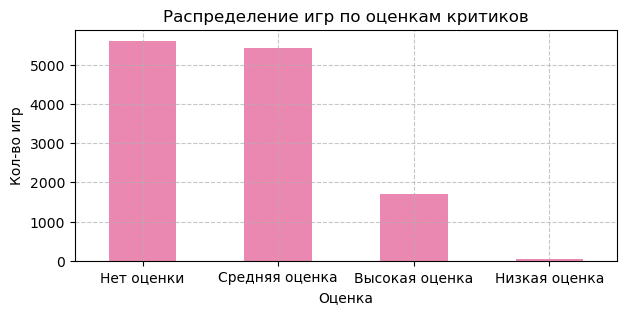

In [61]:
# Строим столбчатую диаграмму
grouped_by_critics.plot(kind='bar',
                        x='critic_score_category',
                        rot=0,
                        figsize=(7, 3),
                        color='#eb88b1',
                        legend=False
               
)

plt.grid(True, linestyle='--', alpha=0.7)

# Настраиваем оформление графика
plt.title(f'Распределение игр по оценкам критиков')
plt.xlabel('Оценка')
plt.ylabel('Кол-во игр')

# Выводим график
plt.show()

In [62]:
# Сгруппируем игры по оценкам пользователей и посчитаем количество игр по группам
grouped_by_users = df_actual_user_score.groupby('user_score_category', 
                                           observed=True).agg(cnt_user_score=('name', 
                                                                              'count')).sort_values(by='cnt_user_score',
                                                                                                            ascending=False)

grouped_by_users = grouped_by_users.reset_index()
grouped_by_users

,user_score_category,cnt_user_score
0,Нет оценки,6298
1,Средняя оценка,4081
2,Высокая оценка,2286
3,Низкая оценка,116


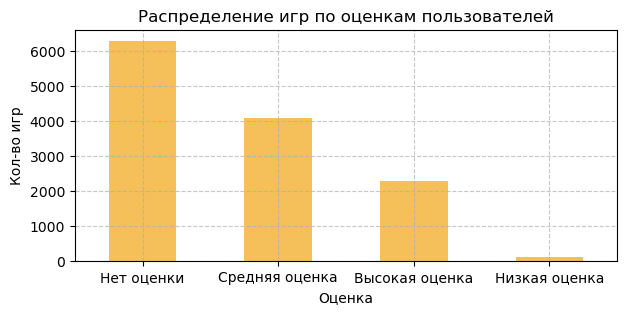

In [63]:
# Строим столбчатую диаграмму
grouped_by_users.plot(kind='bar', 
                        rot=0,
                        x='user_score_category',
                        figsize=(7, 3),
                        color='#f5c05a',
                        legend=False
               
)

plt.grid(True, linestyle='--', alpha=0.7)

# Настраиваем оформление графика
plt.title(f'Распределение игр по оценкам пользователей')
plt.xlabel('Оценка')
plt.ylabel('Кол-во игр')

# Выводим график
plt.show()

In [64]:
df_joined = grouped_by_critics.join(grouped_by_users)
df_joined = df_joined.drop('user_score_category', axis=1)

df_joined

,critic_score_category,cnt_critic_score,cnt_user_score
0,Нет оценки,5612,6298
1,Средняя оценка,5422,4081
2,Высокая оценка,1692,2286
3,Низкая оценка,55,116


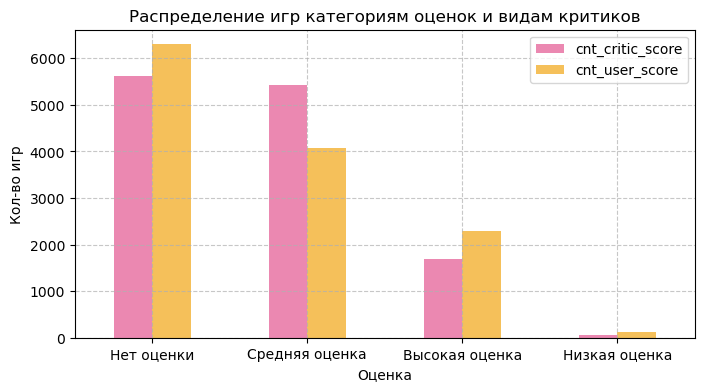

In [65]:
colors = ['#eb88b1', '#f5c05a']

# Строим столбчатую диаграмму
df_joined.plot(kind='bar', 
                        rot=0,
                        x='critic_score_category',
                        figsize=(8, 4),
                        legend=True,
                        color=colors
               
)

plt.grid(True, linestyle='--', alpha=0.7)

# Настраиваем оформление графика
plt.title(f'Распределение игр категориям оценок и видам критиков')
plt.xlabel('Оценка')
plt.ylabel('Кол-во игр')

# Выводим график
plt.show()

#### Промежуточный вывод

В обеих категориях (оценки критиков, оценки пользователей) наибольшее количество игр не имеют оценок (5612 и 6298), наименьшее количество игри имеет низкую оценку (55 и 116).

### Топ-7 платформ по количеству выпушенных игр

Выделим Топ-7 платформ по количеству игр, выпущенных за весь актуальный период. 
3. Рассчитаем для каждого региона коливество млн. проданных копий игр поличество проданных копий для каждого региона.

In [66]:
# Cгруппируем данные по платформам и посчитаем количество выпущенных игр для каждой платформы.
grouped_by_platform = df_actual.groupby('platform').agg(cnt_games=('platform', 
                                                                   'count')).sort_values(by='cnt_games',
                                                                                         ascending=False)
grouped_by_platform = grouped_by_platform.reset_index()
grouped_by_platform = grouped_by_platform[grouped_by_platform.index <= 6]
grouped_by_platform

,platform,cnt_games
0,PS2,2127
1,DS,2120
2,WII,1275
3,PSP,1180
4,X360,1121
5,PS3,1087
6,GBA,811


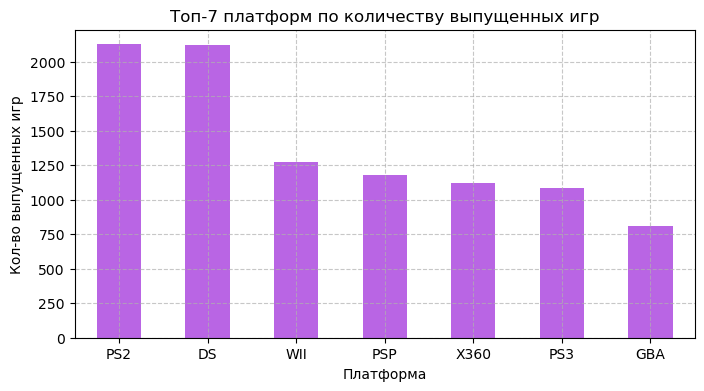

In [67]:
# Строим столбчатую диаграмму
grouped_by_platform.plot(kind='bar', 
                         x='platform',
                         rot=0,
                         figsize=(8, 4),
                         color='#b965e4',
                         legend=False
               
)

plt.grid(True, linestyle='--', alpha=0.7)

# Настраиваем оформление графика
plt.title(f'Топ-7 платформ по количеству выпущенных игр')
plt.xlabel('Платформа')
plt.ylabel('Кол-во выпущенных игр')

# Выводим график
plt.show()

### Топ-7 платформ по количеству проданных копий игр

Рассчитаем для каждого региона коливество млн. проданных копий игр в разрезе платформы.

#### Сверная Америка

In [68]:
# Рассчитаем количество млн. проданных копий в Северной Америке для каждой платформы
na_sales = df_actual.groupby('platform').agg(na_cnt_games=('na_sales', 'sum')).sort_values(by='na_cnt_games',
                                                                                                 ascending=False)
# Сбросим индексы                                                                                     
na_sales = na_sales.reset_index()

# Рассчитаем долю проданных копий
na_sales['na_share'] = na_sales['na_cnt_games'] / na_sales['na_cnt_games'].sum()
na_sales

,platform,na_cnt_games,na_share
0,PS2,572.92,0.176525
1,X360,567.44,0.174836
2,WII,484.79,0.149371
3,DS,380.31,0.117179
4,PS3,368.08,0.113411
5,GBA,184.12,0.056730
6,XB,182.06,0.056095
7,GC,131.94,0.040653
8,PSP,107.27,0.033051
9,PS,65.71,0.020246


In [69]:
# Ограничим выборку
na_sales_slice = na_sales[na_sales.index <= 6]

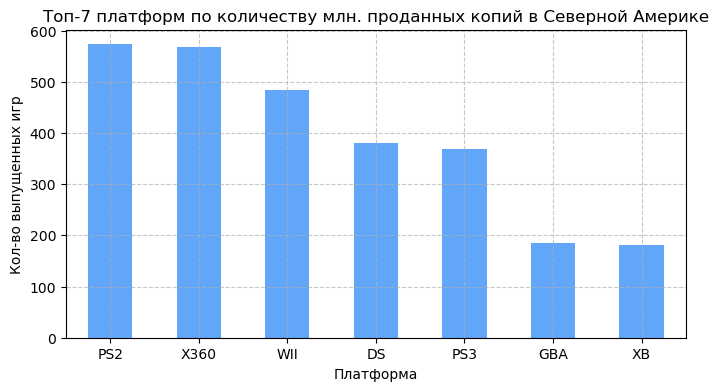

In [70]:
# Строим столбчатую диаграмму
na_sales_slice.plot(kind='bar',
              x='platform',
              y='na_cnt_games',
              rot=0,
              figsize=(8, 4),
              color='#61a6f9',
              legend=False              
)

plt.grid(True, linestyle='--', alpha=0.7)

# Настраиваем оформление графика
plt.title(f'Топ-7 платформ по количеству млн. проданных копий в Северной Америке')
plt.xlabel('Платформа')
plt.ylabel('Кол-во выпущенных игр')

# Выводим график
plt.show()

#### Европа

In [71]:
# Посчитаем количество млн. проданных копий в Северной Америке для каждой платформы
eu_sales = df_actual.groupby('platform').agg(eu_cnt_games=('eu_sales', 
                                                                 'sum')).sort_values(by='eu_cnt_games',
                                                                                     ascending=False)
# Сбросим индексы
eu_sales = eu_sales.reset_index()

# Рассчитаем долю проданных копий
eu_sales['eu_share'] = eu_sales['eu_cnt_games'] / eu_sales['eu_cnt_games'].sum()
eu_sales

,platform,eu_cnt_games,eu_share
0,PS2,331.963784,0.183168
1,PS3,301.670000,0.166453
2,WII,255.730000,0.141104
3,X360,252.299785,0.139212
4,DS,187.441022,0.103425
5,PC,103.370000,0.057037
6,GBA,74.170449,0.040925
7,PSP,65.620000,0.036207
8,XB,59.650000,0.032913
9,PS,46.940000,0.025900


In [72]:
# Ограничим выборку
eu_sales_slice = eu_sales[eu_sales.index <= 6]

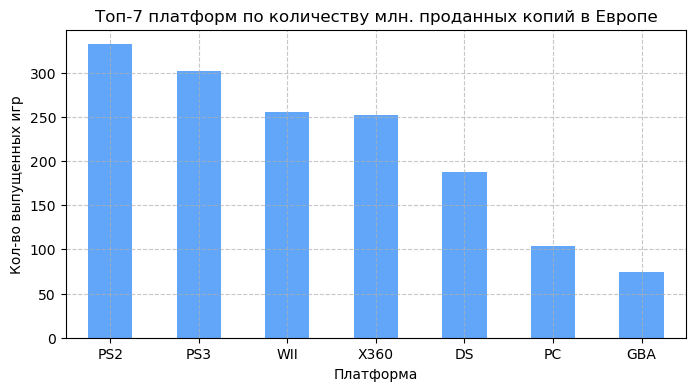

In [73]:
# Строим столбчатую диаграмму
eu_sales_slice.plot(kind='bar',
              x='platform',
              y='eu_cnt_games',
              rot=0,
              figsize=(8, 4),
              color='#61a6f9',
              legend=False
               
)

plt.grid(True, linestyle='--', alpha=0.7)

# Настраиваем оформление графика
plt.title(f'Топ-7 платформ по количеству млн. проданных копий в Европе')
plt.xlabel('Платформа')
plt.ylabel('Кол-во выпущенных игр')

# Выводим график
plt.show()

#### Япония

In [74]:
# Посчитаем количество млн. проданных копий в Северной Америке для каждой платформы
jp_sales = df_actual.groupby('platform').agg(jp_cnt_games=('jp_sales', 'sum')).sort_values(by='jp_cnt_games',
                                                                                                 ascending=False)
# Сбросим индексы
jp_sales = jp_sales.reset_index()

# Рассчитаем долю проданных копий
jp_sales['jp_share'] = jp_sales['jp_cnt_games'] / jp_sales['jp_cnt_games'].sum()
jp_sales

,platform,jp_cnt_games,jp_share
0,DS,175.071260,0.242210
1,PS2,137.540000,0.190286
2,PSP,75.523060,0.104486
3,WII,68.280000,0.094465
4,PS3,68.190000,0.094340
5,3DS,56.380000,0.078001
6,GBA,46.560000,0.064415
7,GC,21.340000,0.029524
8,PS,20.100000,0.027808
9,GB,13.010000,0.017999


In [75]:
# Ограничим выборку
jp_sales_slice = jp_sales[jp_sales.index <= 6]

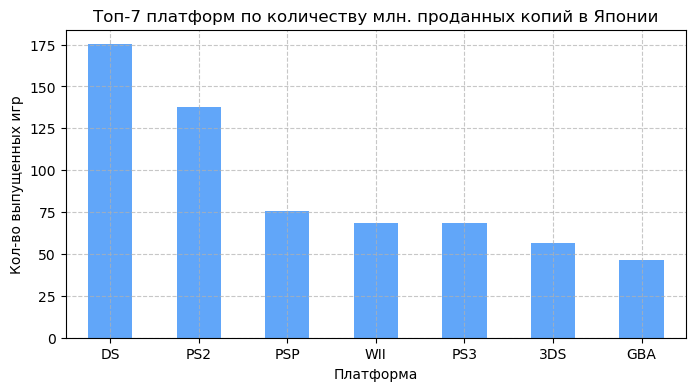

In [76]:
# Строим столбчатую диаграмму
jp_sales_slice.plot(kind='bar', 
              x='platform',
              y='jp_cnt_games',
              rot=0,
              figsize=(8, 4),
              color='#61a6f9',
              legend=False
               
)

plt.grid(True, linestyle='--', alpha=0.7)

# Настраиваем оформление графика
plt.title(f'Топ-7 платформ по количеству млн. проданных копий в Японии')
plt.xlabel('Платформа')
plt.ylabel('Кол-во выпущенных игр')

# Выводим график
plt.show()

#### Общий график продаж по всем регионам

In [77]:
df_merget = na_sales.merge(eu_sales, on='platform')
df_merget = df_merget.merge(jp_sales, on='platform')

In [78]:
df_merget.sort_values(by='na_share', ascending=False)

,platform,na_cnt_games,na_share,eu_cnt_games,eu_share,jp_cnt_games,jp_share
0,PS2,572.92,0.176525,331.963784,0.183168,137.540000,0.190286
1,X360,567.44,0.174836,252.299785,0.139212,12.224043,0.016912
2,WII,484.79,0.149371,255.730000,0.141104,68.280000,0.094465
3,DS,380.31,0.117179,187.441022,0.103425,175.071260,0.242210
4,PS3,368.08,0.113411,301.670000,0.166453,68.190000,0.094340
5,GBA,184.12,0.056730,74.170449,0.040925,46.560000,0.064415
6,XB,182.06,0.056095,59.650000,0.032913,1.380000,0.001909
7,GC,131.94,0.040653,38.320000,0.021144,21.340000,0.029524
8,PSP,107.27,0.033051,65.620000,0.036207,75.523060,0.104486
9,PS,65.71,0.020246,46.940000,0.025900,20.100000,0.027808


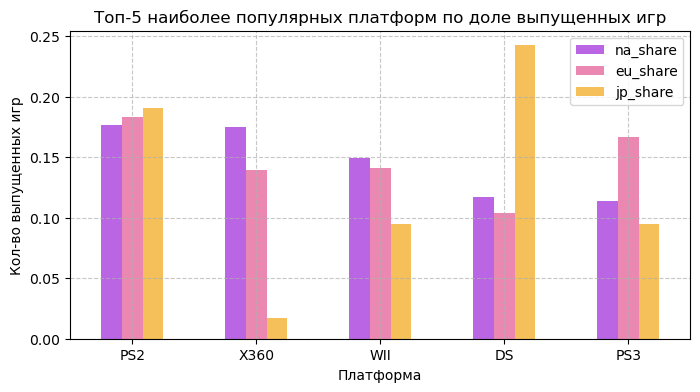

In [79]:
df_merget = df_merget[df_merget.index <= 4]

colors = ['#b965e4', '#eb88b1', '#f5c05a']

# Строим столбчатую диаграмму
df_merget.plot(kind='bar', 
              x='platform',
              y=['na_share', 'eu_share', 'jp_share'],
              rot=0,
              figsize=(8, 4),
              legend=True,
              color=colors      
)

plt.grid(True, linestyle='--', alpha=0.7)

# Настраиваем оформление графика
plt.title(f'Топ-5 наиболее популярных платформ по доле выпущенных игр')
plt.xlabel('Платформа')
plt.ylabel('Кол-во выпущенных игр')

# Выводим график
plt.show()

#### Промежуточный вывод

1. Наибольшее количество выпущенных игр у платформы **PS2** (2127).
2. Наибольшее количество проданных копий в Северной Америке у платформы **PS2** (572 млн.), что составляет 17% от общего количества. Наименее популярны платформы **DC** (2.53 млн.) и **WS** (0).
4. В Европе также лидирует платформа **PS2** (331 млн.), что составляет 18% от общего количества. На последнем месте **DC** (0.79 млн.) и **WS** (0).
5. В Японии результаты существенно отличаются, на первом месте **DS** (175 млн.), на последенем **XONE** (0.02 млн.). Платформа **PS2** находящаяся на первом месте по количеству выпущенных игр и количеству проданных млн. копий в Северной Америке и Европе, в Японии находится на втором месте по популярности **PS2** (137 млн.).                                                                                                         

### Топ игр по жанрам

#### Топ по количеству выпущенных игры

Проведем дополнительный анализ выпуска игр по жанрам.

In [80]:
grouped_by_genre = df_actual.groupby('genre').agg(cnt_games_g=('platform', 
                                                                    'count')).sort_values(by='cnt_games_g',
                                                                                          ascending=False)
grouped_by_genre = grouped_by_genre.reset_index()
grouped_by_genre

,genre,cnt_games_g
0,action,2460
1,sports,1818
2,misc,1484
3,role-playing,1079
4,adventure,1009
5,shooter,1001
6,racing,966
7,simulation,724
8,platform,682
9,fighting,580


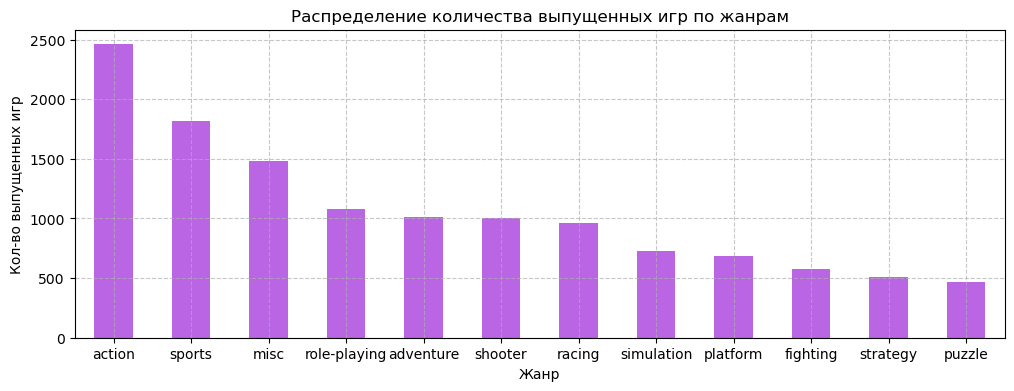

In [81]:
# Строим столбчатую диаграмму
grouped_by_genre.plot(kind='bar', 
                         x='genre',
                         rot=0,
                         figsize=(12, 4),
                         color='#b965e4',
                         legend=False
               
)

plt.grid(True, linestyle='--', alpha=0.7)

# Настраиваем оформление графика
plt.title(f'Распределение количества выпущенных игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Кол-во выпущенных игр')

# Выводим график
plt.show()

#### Количество проданных копий в Северной Америке

In [82]:
# Рассчитаем количество млн. проданных копий в Северной Америке для каждого жанра
na_sales_g = df_actual.groupby('genre').agg(na_cnt_games=('na_sales', 'sum')).sort_values(by='na_cnt_games',
                                                                                                 ascending=False)
# Сбросим индексы                                                                                     
na_sales_g = na_sales_g.reset_index()

na_sales_g

,genre,na_cnt_games
0,action,679.74
1,sports,543.26
2,shooter,416.21
3,misc,350.22
4,racing,263.57
5,platform,250.76
6,role-playing,248.83
7,simulation,159.54
8,fighting,148.34
9,adventure,76.49


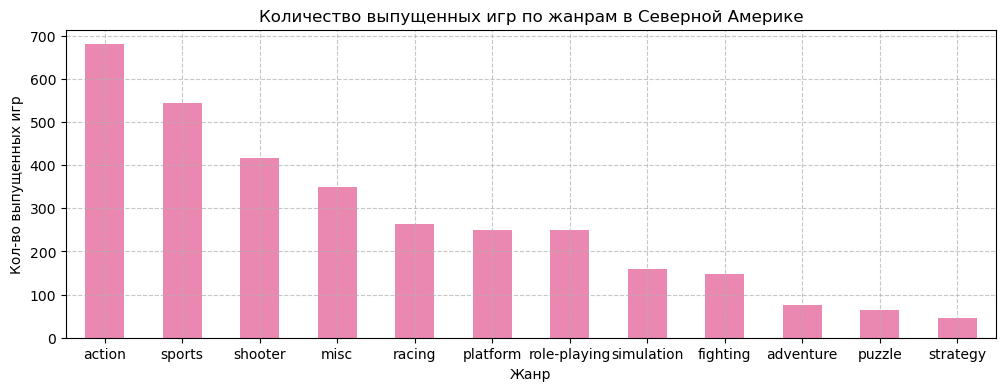

In [83]:
# Строим столбчатую диаграмму
na_sales_g.plot(kind='bar',
              x='genre',
              rot=0,
              figsize=(12, 4),
              color='#eb88b1',
              legend=False              
)

plt.grid(True, linestyle='--', alpha=0.7)

# Настраиваем оформление графика
plt.title(f'Количество выпущенных игр по жанрам в Северной Америке')
plt.xlabel('Жанр')
plt.ylabel('Кол-во выпущенных игр')

# Выводим график
plt.show()

#### Количество проданных копий в Европе

In [84]:
# Рассчитаем количество млн. проданных копий в Северной Америке для каждого жанра
eu_sales_g = df_actual.groupby('genre').agg(eu_cnt_games=('eu_sales', 'sum')).sort_values(by='eu_cnt_games',
                                                                                                 ascending=False)
# Сбросим индексы                                                                                     
eu_sales_g = eu_sales_g.reset_index()

# Рассчитаем долю проданных копий
# na_sales['na_share'] = na_sales['na_cnt_games'] / na_sales['na_cnt_games'].sum()
eu_sales_g

,genre,eu_cnt_games
0,action,390.170708
1,sports,293.850000
2,shooter,228.500000
3,misc,183.413883
4,racing,177.890000
5,platform,132.780449
6,role-playing,127.520000
7,simulation,97.400000
8,fighting,67.820000
9,adventure,43.010000


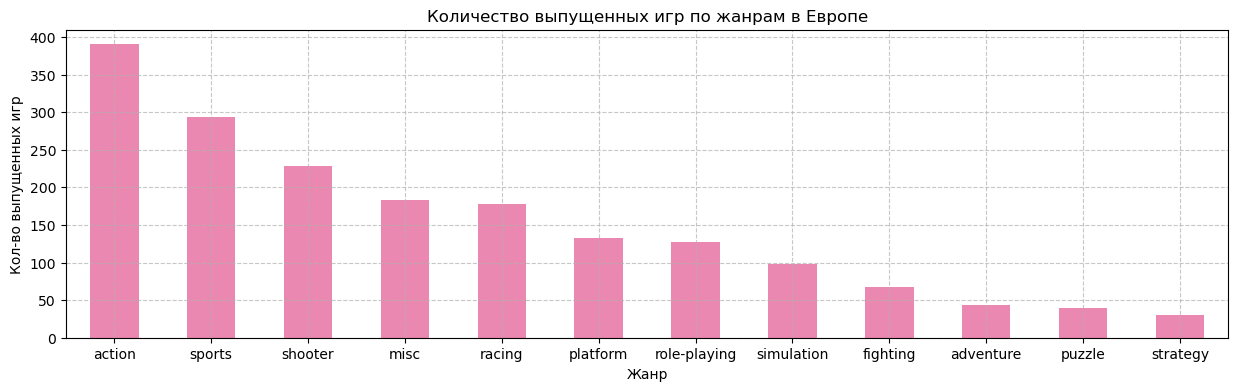

In [85]:
# Строим столбчатую диаграмму
eu_sales_g.plot(kind='bar',
              x='genre',
              rot=0,
              figsize=(15, 4),
              color='#eb88b1',
              legend=False              
)

plt.grid(True, linestyle='--', alpha=0.7)

# Настраиваем оформление графика
plt.title(f'Количество выпущенных игр по жанрам в Европе')
plt.xlabel('Жанр')
plt.ylabel('Кол-во выпущенных игр')

# Выводим график
plt.show()

#### Количество проданных копий в Японии

In [86]:
# Рассчитаем количество млн. проданных копий в Северной Америке для каждого жанра
jp_sales_g = df_actual.groupby('genre').agg(jp_cnt_games=('jp_sales', 'sum')).sort_values(by='jp_cnt_games',
                                                                                                 ascending=False)
# Сбросим индексы                                                                                     
jp_sales_g = jp_sales_g.reset_index()

# Рассчитаем долю проданных копий
# na_sales['na_share'] = na_sales['na_cnt_games'] / na_sales['na_cnt_games'].sum()
jp_sales_g

,genre,jp_cnt_games
0,role-playing,210.550000
1,action,102.642721
2,misc,79.891260
3,sports,72.620000
4,platform,52.583060
5,fighting,38.531322
6,simulation,37.850000
7,adventure,33.740000
8,strategy,26.760000
9,racing,25.980000


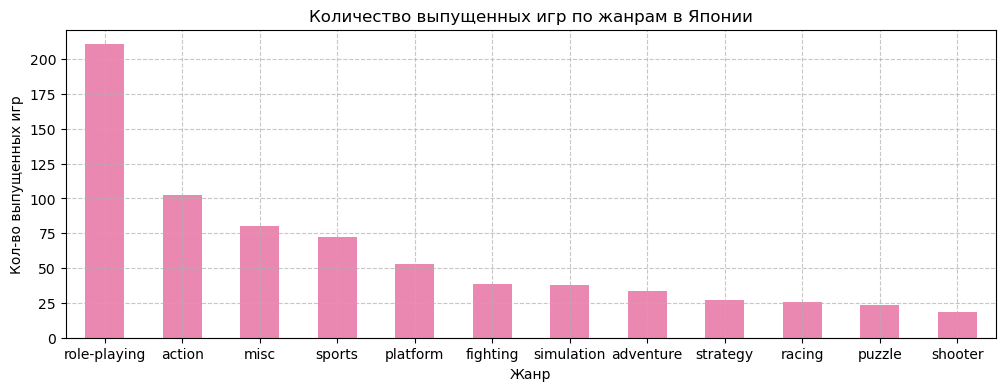

In [87]:
# Строим столбчатую диаграмму
jp_sales_g.plot(kind='bar',
              x='genre',
              rot=0,
              figsize=(12, 4),
              color='#eb88b1',
              legend=False              
)

plt.grid(True, linestyle='--', alpha=0.7)

# Настраиваем оформление графика
plt.title(f'Количество выпущенных игр по жанрам в Японии')
plt.xlabel('Жанр')
plt.ylabel('Кол-во выпущенных игр')

# Выводим график
plt.show()

#### Промежуточный вывод

**Топ-3 жанров по количеству выпущенных игр:**
1. action - 2460 шт.;
2. sports - 1818 шт.;
3. misc - 1484 шт.;

Наименее популярный жанр **puzzle**- 465 шт.

**Кол-во млн. проданных копий по регионам**

**Сверная Америка:**
1. action	679 млн.;
2. sports	543 млн.;
3. shooter	416 млн.;

Наименее популярный жанр **strategy** - 45 млн.

**Европа:**
1. action	390 млн.;
2. sports	293 млн.;
3. shooter	228 млн.;

Наименее популярный жанр **strategy** - 30 млн.

**Япония:**
1. role-playing - 210 млн.;
2. action - 102 млн.;
3. misc - 79 млн.;

Наименее популярный жанр **shooter** - 18 млн.

Наимболее популярный жанр по кол-ву проданных млн. копий в Северной Америке и Европе **action** (679 и 390), в Японии находится на 2-ом месте 102 млн.

Наимболее популярный в японии жанр **role-playing** (210 млн.), в Северной Америке находится на 7-ом месте 248 млн. проданных копий, в Европе также на 7-ом 127 млн. проданных копий. 

Жанр **strategy** одинаково не популярен как Америке и Европе, так и в Японии. При этом наименее популярный в Японии жанр **shooter**, в Северной Америке и Европе входит в тройку лидеров.

## Итоговый вывод

### Проделанная работа

1. Приведение типов данных к корректным форматам.
2. Обработка пропущенных значений.  
3. Очистка данных от явных и неявных дубликатов.   
4. Формирование среза данных: были отобраны игры, выпущенные в период с 2000 по 2013 год включительно (по полю `year_of_release`).   
5. Категоризация: на основе пользовательских и критических оценок были созданы шесть категорий. Для каждой категории посчитано количество игр.   
6. Проведена группировка данных по игровым платформам. Выделены 7 самых популярных платформ по количеству выпущенных игр за указанный период.
    

---

### Используемый срез данных

Игры, выпущенные в период с 2000 по 2013 год включительно.

---

### Новые поля

В результате обработки в датафрейм были добавлены следующие поля:

- `year_int` — год выхода игры в виде целого числа (для фильтрации по периоду);
- `user_score_category` — категория игры по пользовательской оценке; 
- `critic_score_category` — категория игры по оценке критиков.
    

---

### Вывод

С 2000 по 2013 год наибольшее количество игр выпустили следующие платформы:

- **PS2** — 2127 игр
- **DS** — 2120 игр
- **WII** — 1275 игр
   

Больше всего игр (8104) попали в категорию со **средней оценкой** как от пользователей, так и от критиков. На втором месте — игры с **высокой оценкой пользователей и средней оценкой критиков** (1915 игр), на третьем — игры с **высокой оценкой как пользователей, так и критиков** (1085 игр).

При этом:

- Лишь **одна игра** получила высокую оценку критиков и низкую от пользователей.   
- Всего **две игры** имели низкий рейтинг от критиков, но высокую пользовательскую оценку.
    

Это говорит о том, что чаще всего мнения критиков и пользователей совпадают, особенно в среднем диапазоне оценок.

Наблюдаются значительные различия в популярности платформ по регионам:

|Регион|1-е место|2-е место|3-е место|
|---|---|---|---|
|Северная Америка|PS2 (572 млн копий)|X360 (567 млн копий)|WII (484 млн копий)|
|Европа|PS2 (331 млн копий)|PS3 (301 млн копий)|WII (255 млн копий)|
|Япония|DS (175 млн копий)|PS2 (137 млн копий)|PSP (75 млн копий)|

- **PS2** — самая популярная платформа в Северной Америке и Европе.   
- **DS** лидирует по продажам в Японии.

Наименее популярные платформы:

- В **Северной Америке** и **Европе** — **WS**, с нулевым объемом продаж.  
- В **Японии** — **XONE**, также с нулевыми продажами.
    

Что касается жанров, то здесь региональные различия еще ярче:

**Топ-3 жанра в Северной Америке и Европе:**

1. Action  
2. Sports   
3. Shooter
    
**Топ-3 жанра в Японии:**
1. Role-Playing   
2. Action   
3. Misc 

Таким образом, жанр **Role-Playing**, занимающий первое место в Японии, в Северной Америке и Европе находится лишь в середине рейтинга. А вот жанр **Shooter**, популярный на Западе, в Японии занимает последнее место.